<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/DesitionTree/DecisionTreeTrainingTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Nombre del estudiante
Estudiante = "" #@param {type:"string"}
Código = "" #@param {type:"string"}

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


sns.set(rc={'figure.figsize':(20,20)})


# Descargar el archivo automaticamente 
!wget https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/DesitionTree/data/bank/bank-full.csv

--2022-04-19 23:48:50--  https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/DesitionTree/data/bank/bank-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘bank-full.csv.2’

bank-full.csv.2     100%[===================>]   4.40M  --.-KB/s    in 0.09s   

2022-04-19 23:48:51 (49.0 MB/s) - ‘bank-full.csv.2’ saved [4610348/4610348]



---
# Ejercicio 1

Dataset: [Credit](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

**Source:**

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.There are four datasets:1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Attribute Information:**

```
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown') # related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. # other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') # social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



## 1.


> Importa en el dataframe ```df``` el archivo ```bank-full.csv```, toma nota que el separador es punto y coma.

In [8]:
df = pd.read_csv('bank-full.csv', sep=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
23685,39,technician,single,tertiary,no,1522,yes,no,cellular,28,aug,15,8,-1,0,unknown,no
9046,47,unemployed,married,primary,no,2946,no,no,unknown,5,jun,60,1,-1,0,unknown,no
38497,40,admin.,married,secondary,no,2574,yes,no,cellular,15,may,432,1,176,1,failure,yes
37647,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
35755,39,blue-collar,married,secondary,no,860,yes,no,cellular,8,may,312,1,-1,0,unknown,no
37991,43,blue-collar,married,primary,no,1,yes,yes,cellular,14,may,649,2,-1,0,unknown,no
25698,33,self-employed,married,tertiary,no,-103,yes,no,cellular,19,nov,149,2,175,1,failure,no
43923,32,self-employed,single,tertiary,no,46,yes,no,cellular,14,jun,485,2,-1,0,unknown,yes
40141,36,management,single,tertiary,no,2163,no,no,cellular,5,jun,317,1,-1,0,unknown,no
31904,58,retired,married,secondary,no,2126,no,no,cellular,9,apr,184,1,-1,0,unknown,no


# 2.
¿Cuantos registros y columnas tiene df?

In [15]:
df.shape

(45211, 17)

# 3.
Realiza un mapa de correlación de df.

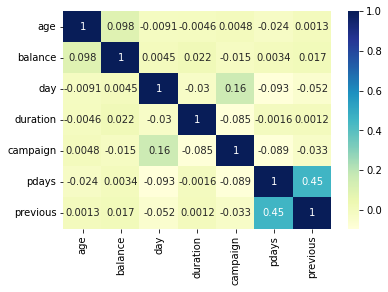

In [17]:
# sns heatmap

# 4.
> ¿Cuantas categorias tiene la variable ```month```?

> ¿Es un predictor?

> Elimina la columna ```month``` del dataframe ```df```

In [25]:
df = df.drop(['month'], axis=1)

# 5.
convierte las columnas categoricas en dummies, es decir valores de 1 y 0 para cada categoria y almacenalo en la variable df_dummies.

¿Cuantas columnas tienes ahora?

In [28]:
df_dummies = pd.get_dummies(data=df, drop_first=True)

In [29]:
df_dummies.sample(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
1247,49,-8,8,1119,1,-1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
12491,37,0,1,1135,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
6394,40,-666,27,107,2,-1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
41074,57,479,14,82,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9469,56,763,6,181,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# 6.
> Realiza un mapa de correlación a df_dummies

¿Existe alguna correlación entre las variables?

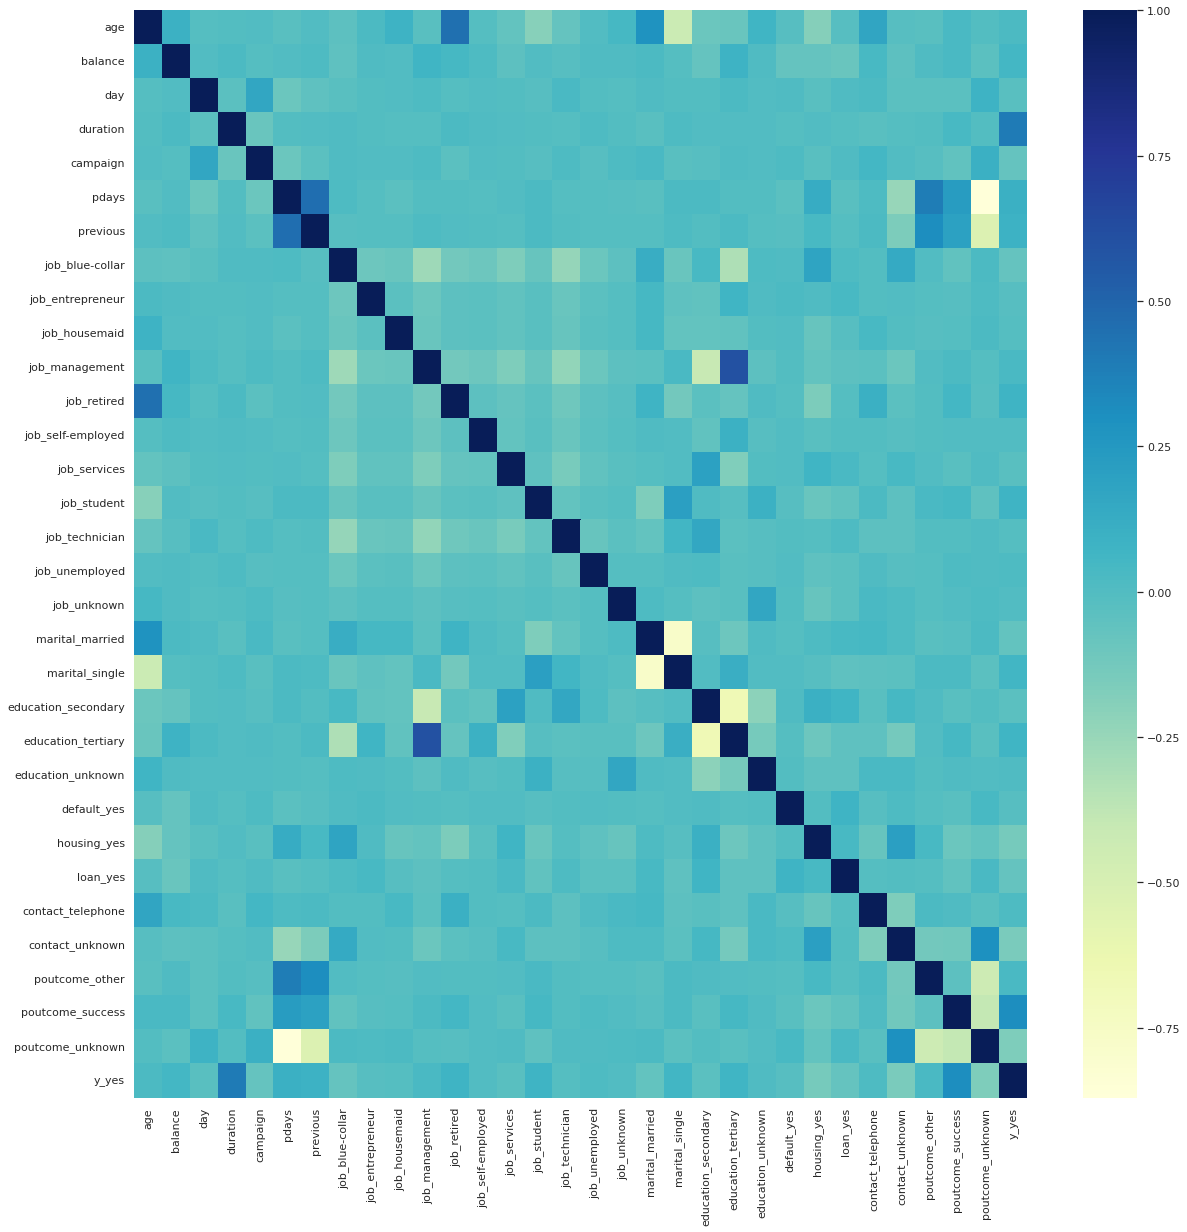

In [30]:
sns.heatmap(df_dummies.corr(), cmap="YlGnBu")

# 7.
Asigna los valores de ```y``` y ```X```


In [31]:
y = df_dummies.y_yes
X = df_dummies.drop(['y_yes'], axis=1)

# Dividir el dataframe en data de entrenamiento y data de test


In [71]:
# Dividir el dataframe
# 70% training and 30% test
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=1)


## Entrena el modelo con ```train_X```y ```train_y```

In [65]:
model = DecisionTreeClassifier(max_depth=3)

model = model.fit(train_X,train_y)


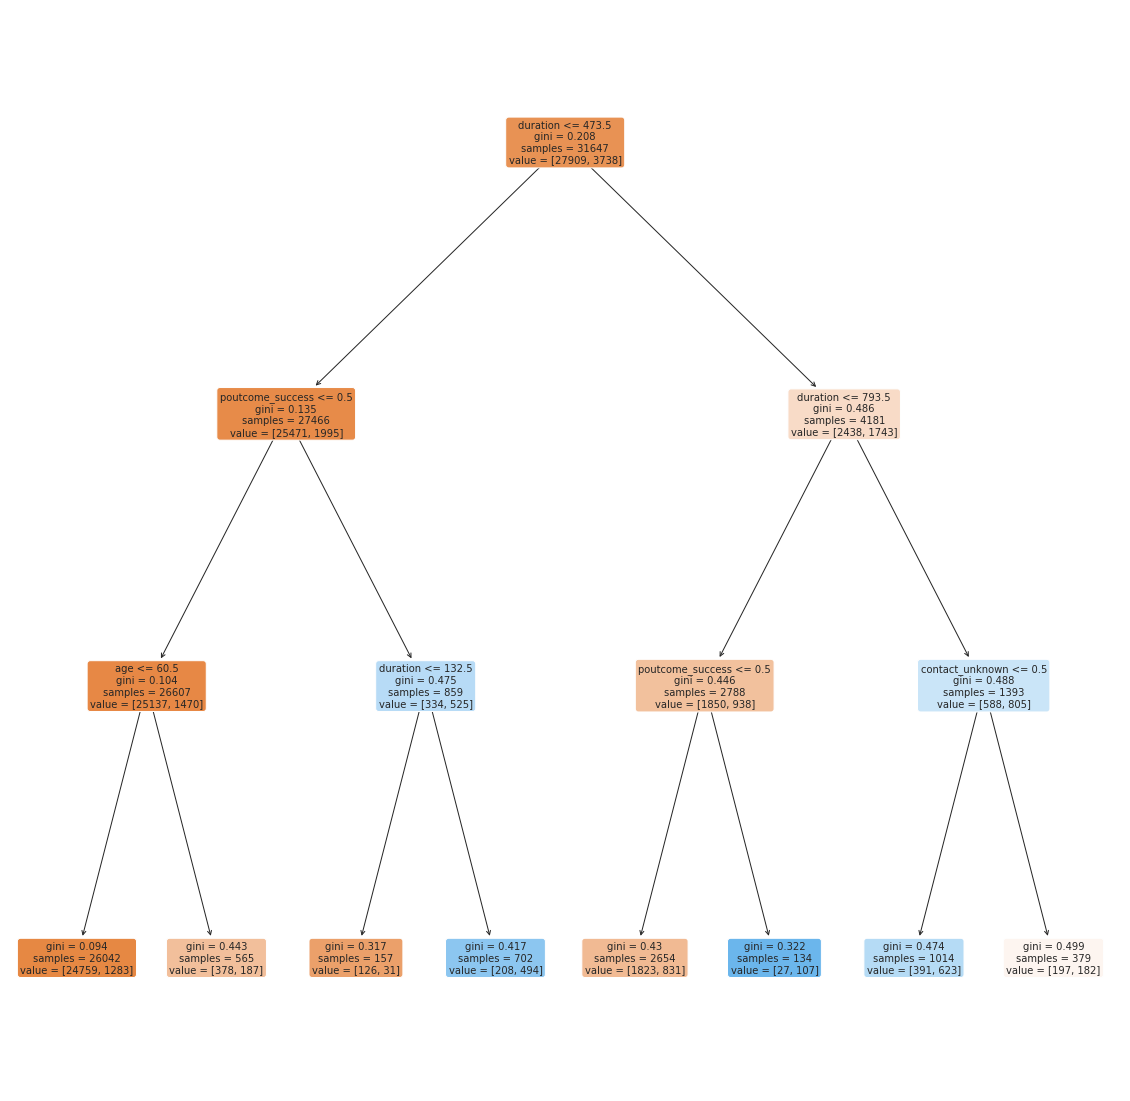

In [66]:
col_names_list = list(train_X.columns.values)
fig = plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, rounded=True,  feature_names=col_names_list)
plt.show()

## Predecimos los valores de entrenamiento de X

In [67]:
#Predict the response for test dataset
y_pred = model.predict(val_X)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))

Accuracy: 0.9023149513417871


In [68]:
def tree_hyperparameters_fit(max_leaf_nodes,max_depth):
  model = DecisionTreeClassifier( max_leaf_nodes=max_leaf_nodes, max_depth=max_depth)
  model = model.fit(train_X, train_y)
  y_pred = model.predict(val_X)
  print("max_leaf_nodes:", max_leaf_nodes,"max_depth:", max_depth, "Accuracy:",metrics.accuracy_score(val_y, y_pred))

In [69]:
hyperparameters = [
    [5,4],
    [2,2],
    [4,4],
    [10,10],
    [20,20],
    [10000,10000],
    [100,100]
  ]

In [73]:
for hp in hyperparameters:
  tree_hyperparameters_fit(hp[0],hp[1])

max_leaf_nodes: 5 max_depth: 4 Accuracy: 0.8962695370097317
max_leaf_nodes: 2 max_depth: 2 Accuracy: 0.8856531996461221
max_leaf_nodes: 4 max_depth: 4 Accuracy: 0.8962695370097317
max_leaf_nodes: 10 max_depth: 10 Accuracy: 0.9012828074314362
max_leaf_nodes: 20 max_depth: 20 Accuracy: 0.9006192863462106
max_leaf_nodes: 10000 max_depth: 10000 Accuracy: 0.8638307283987025
max_leaf_nodes: 100 max_depth: 100 Accuracy: 0.9001032143910351


# 8.
¿Cúal es la mejor combinación de hiperparametros?

Invesiga que otros hiperparametros existen de arbol de decisión en SKLEARN